In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [2]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [9]:
dfRatioPsi2sJpsiVsPtAllRuns = pd.read_csv('systematic_ratio_pT.txt', sep=' ')
ptMinAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_min"]
ptMaxAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_max"]
ptAllRuns = (ptMinAllRuns + ptMaxAllRuns) / 2.
errPtAllRuns = (ptMaxAllRuns - ptMinAllRuns) / 2.

dfRatioAxeVsPtAllRuns = pd.read_csv('systematic_Axe_pT.txt', sep=' ')
ratioAxeVsPtAllRuns = dfRatioAxeVsPtAllRuns["val"]
statRatioAxeVsPtAllRuns = dfRatioAxeVsPtAllRuns["stat"]

ratioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["val"] / dfRatioAxeVsPtAllRuns["val"]
print(ratioPsi2sJpsiVsPtAllRuns)
statRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["stat"]
errStatTotal = ratioPsi2sJpsiVsPtAllRuns * np.sqrt((statRatioPsi2sJpsiVsPtAllRuns / dfRatioPsi2sJpsiVsPtAllRuns["val"])**2 + (statRatioAxeVsPtAllRuns / dfRatioAxeVsPtAllRuns["val"])**2)
systRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["syst"]
syst_additional = 0.023 * ratioPsi2sJpsiVsPtAllRuns
systRatioPsi2sJpsiVsPtAllRuns = np.sqrt(systRatioPsi2sJpsiVsPtAllRuns**2 + syst_additional**2)

dfRatioPsi2sJpsiVsPtPrel = pd.read_csv('systematic_ratio_Run2_corrected_pT.txt', sep=' ')
ptMinPrel = dfRatioPsi2sJpsiVsPtPrel["x_min"]
ptMaxPrel = dfRatioPsi2sJpsiVsPtPrel["x_max"]
ptPrel = (ptMinPrel + ptMaxPrel) / 2.
errPtPrel = (ptMaxPrel - ptMinPrel) / 2.

ratioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["val"]
statRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["stat"]
systRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["syst"]


0    0.007849
1    0.010542
2    0.010875
3    0.010911
Name: val, dtype: float64


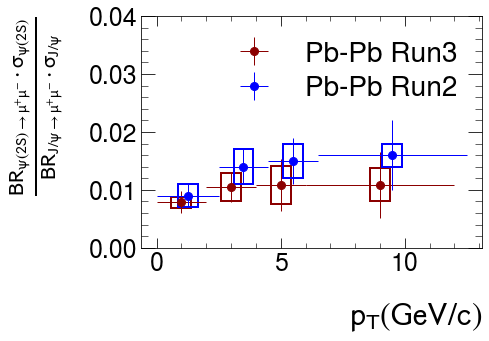

In [10]:
# Creating histogram
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(6, 4))
plot_syst(ptAllRuns, 0.4, ratioPsi2sJpsiVsPtAllRuns, systRatioPsi2sJpsiVsPtAllRuns, ax, 'darkred', 2)
plot_syst(ptPrel, 0.4, ratioPsi2sJpsiVsPtPrel, systRatioPsi2sJpsiVsPtPrel, ax, 'blue', 2)

plt.xlabel(r'$p_{T} (GeV/c)$') 
plt.ylabel(r'$\frac{\mathrm{BR}_{\psi(2S) \to \mu^{+}\mu^{-}} \cdot \sigma_{\psi(2S)}}{\mathrm{BR}_{\mathrm{J}/\psi \to \mu^{+}\mu^{-}} \cdot \sigma_{\mathrm{J}/\psi}}$')
plt.ylim(0.0, 0.04)
#plt.yscale('log')
plt.errorbar(ptAllRuns, ratioPsi2sJpsiVsPtAllRuns, xerr=errPtAllRuns, yerr=statRatioPsi2sJpsiVsPtAllRuns, label="Pb-Pb Run3", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(ptPrel, ratioPsi2sJpsiVsPtPrel, xerr=errPtPrel, yerr=statRatioPsi2sJpsiVsPtPrel, label="Pb-Pb Run2", fmt='o', color='blue', ecolor='blue')
plt.legend(loc='upper right')
#plt.text(6, 3e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
#plt.text(6, 1.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
#plt.savefig("sig_jpsi_vs_pt_vs_centrality.pdf", format="pdf", bbox_inches="tight")
plt.show()